In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [83]:
f = lambda x : x**2 - 15*x + 1
frist_der=lambda x : 2 * x - 15 # frist derivative
seconed_der= lambda x : 2  #seconed derivative


In [86]:
x_values = np.linspace(-40, 60, 6)
y_values = f(x_values)
y_values_frist = frist_der(x_values)
y_values_seconed = [seconed_der(x) for x in x_values]

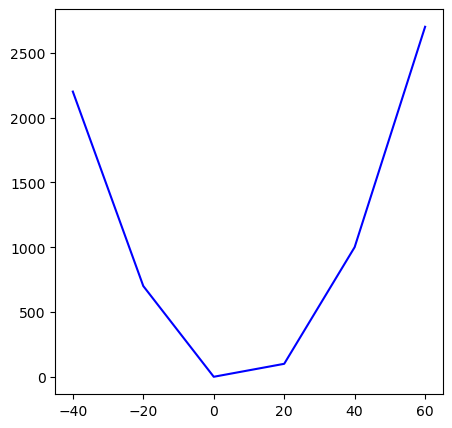

In [87]:
plt.figure(figsize=(5, 5))
plt.plot(x_values, y_values, label='f(x) = x^2 - 15x + 1', color='blue');


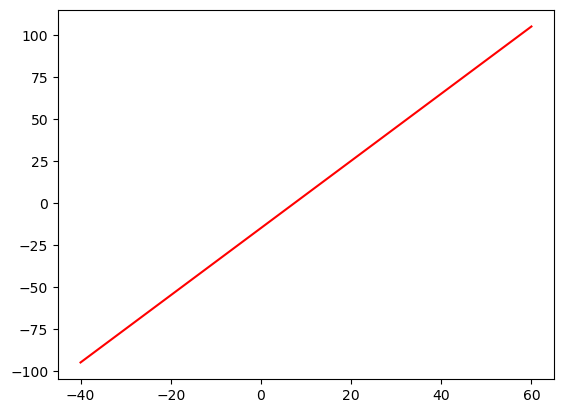

In [88]:
plt.plot(x_values, y_values_frist, label="f'(x) = 2x - 15", color='red')

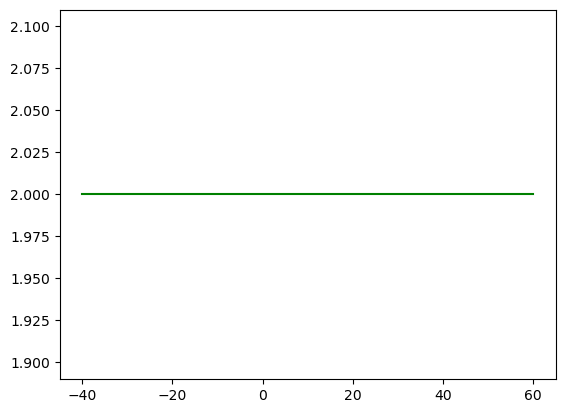

In [30]:
plt.plot(x_values, y_values_seconed, label="f'(x) = 2x - 15", color='green');

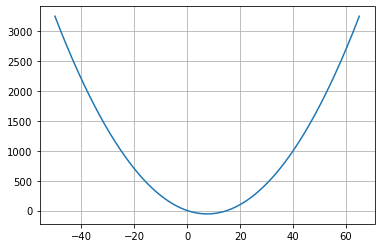

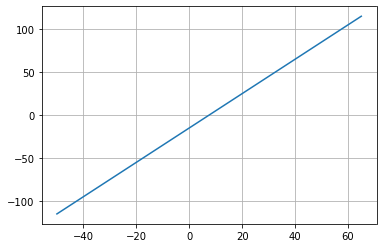

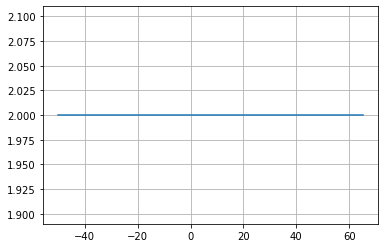

In [89]:
def GD(start , epsilon , alpha , max_iters):
    x=start
    for i in range(max_iters):
        gradient=frist_der(x)
        if abs(gradient) < epsilon:
            break
        x= x - alpha * gradient 
    print(f"GD Results with x0 ={start}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = {x}")
    print(f"gradient  {gradient}")
        
    

In [90]:
GD(40,0.1,0.01,500)

GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
gradient  0.09919360038422198


In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [106]:
def newton(start , epsilon , max_itrs,alpha=0):
    x=start
    Xs=[]
    for i in range(max_itrs):
        Xs.append(x)
        gradient=frist_der(x)
        if gradient < epsilon:
            break
        seconed_d=seconed_der(x)
        x = x -   gradient / seconed_d 
    print(f"NEWTON Results with x0 ={start}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = {x}")
    print(f"gradient  {gradient}")
        


In [127]:
def newtonWithAlpha(start , epsilon , max_itrs,alpha):
    x=start
    Xs=[]
    for i in range(max_itrs):
        Xs.append(x)
        gradient=frist_der(x)
        if gradient < epsilon:
            break
        seconed_d=seconed_der(x)
        x = x -   alpha *gradient / seconed_d 
    print(f"NEWTON Results with x0 ={start}, epsilon={epsilon} , learning rate ={alpha}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = {x}")
    print(f"gradient  {gradient}")

In [107]:
newton(40,0.1,300)


NEWTON Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
gradient  0.0


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [128]:
newtonWithAlpha(40,0.1,300,0.8)

NEWTON Results with x0 =40, epsilon=0.1 , learning rate =0.8
Found solution after 5 iterations.
x_min = 7.5104
gradient  0.020799999999999486


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [108]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

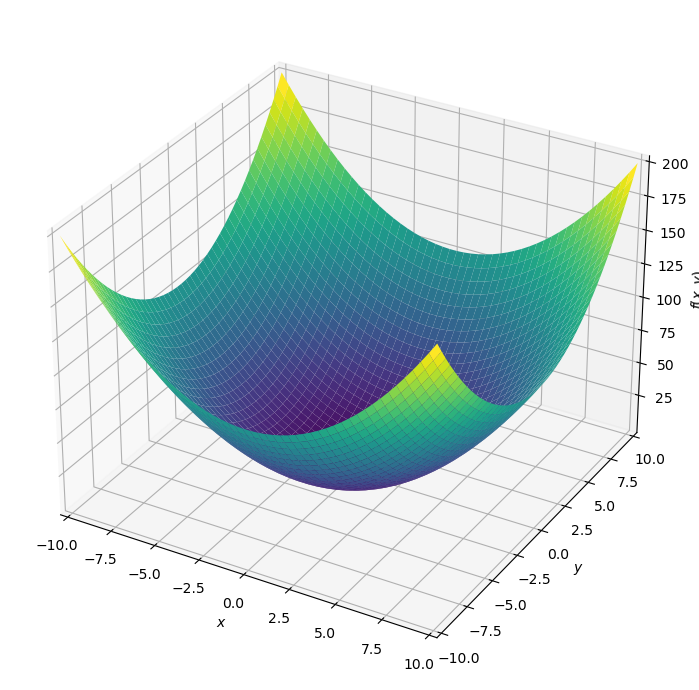

In [109]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

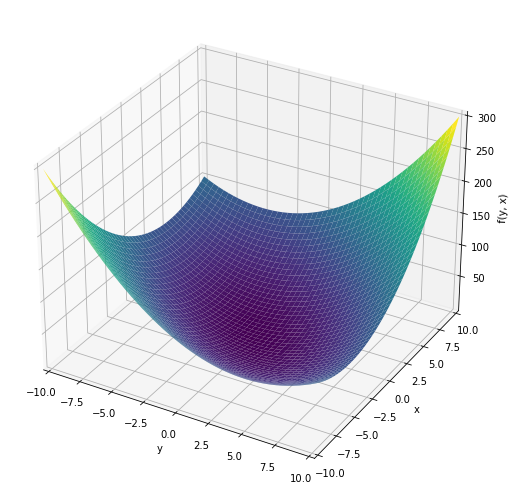

In [11]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

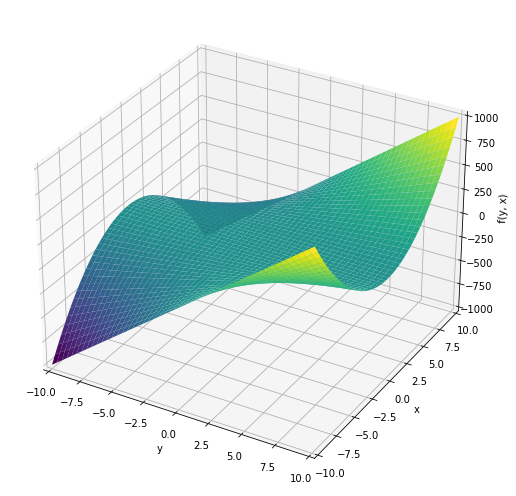

In [12]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [233]:
# frist function 
f1=lambda x,y: x**2 + y**2
# f1_grad = lambda xy: np.array([[2*xy[0,0]],
#                                [2*xy[1,0]]])
f1_grad = lambda xy: np.array([2*xy[0], 2*xy[1]])
#seconed function 
f2 = lambda x,y: x**2 + x*y + y**2
f2_grad = lambda xy: np.array([[2*xy[0,0]+xy[1,0]]
                               ,[ 2*yx[1,0]+xy[0,0]]])
#third function 
f3 = lambda x ,y : x**2 * y
f3_grad= lambda x , y :np.array([2*x*y, x**2])


In [150]:
def GD(f, grad_f, start, epsilon, learning_rate, max_iters):
    x = np.array(start)
    for i in range(max_iters):
        gradient = grad_f(x[0], x[1])
        if np.linalg.norm(gradient) < epsilon:
            break
        x = x - learning_rate * gradient
    print(f"Gradient Descent Results with start={start}, epsilon={epsilon}, lr={learning_rate}")
    print(f"Found solution after {i} iterations.")
    print(f"x,y_min = {x}")
    print(f"gradient  {gradient}")

In [149]:
def NEWTON(f, grad_f, start, epsilon, max_iters):
    x = np.array(start)
    for i in range(max_iters):
        gradient = grad_f(x[0], x[1])
        hessian = np.array([[2, 0], [0, 2]])  # identity matrix 
        if np.linalg.norm(gradient) < epsilon:
            break
        x = x - np.linalg.inv(hessian) @ gradient
    print(f"Newton's Method Results with start={start}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x,y_min = {x}")
    print(f"gradient  {gradient}")

In [148]:
def newton_alpha(f, grad_f, start, epsilon, alpha, max_iters):
    x = np.array(start)
    for i in range(max_iters):
        gradient = grad_f(x[0], x[1])
        hessian = np.array([[2, 0], [0, 2]])  # Hessian for f(x, y) = x^2 + y^2
        if np.linalg.norm(gradient) < epsilon:
            break
        x = x - alpha * np.linalg.inv(hessian) @ gradient
    print(f"Newton's Method with Learning Rate Results with start={start}, epsilon={epsilon}, lr={alpha}")
    print(f"Found solution after {i} iterations.")
    print(f"x,y_min = {x}")
    print(f"gradient  {gradient}")

# Frist function 

In [145]:
GD(f1, f1_grad, [10,10], 0.001, 0.1, 300)

Gradient Descent Results with start=[10, 10], epsilon=0.001, lr=0.1
Found solution after 46 iterations.
x_min = [0.00034845 0.00034845]
gradient  [0.0006969 0.0006969]


In [151]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


In [152]:
GD(f1, f1_grad, [10,10], 0.001, 0.5, 300)

Gradient Descent Results with start=[10, 10], epsilon=0.001, lr=0.5
Found solution after 1 iterations.
x,y_min = [0. 0.]
gradient  [0. 0.]


In [60]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [153]:
 NEWTON(f1, f1_grad, [10,10], 0.001, 300)

Newton's Method Results with start=[10, 10], epsilon=0.001
Found solution after 1 iterations.
x,y_min = [0. 0.]
gradient  [0. 0.]


In [61]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [154]:
newton_alpha(f1, f1_grad, [10,10], 0.001, 0.5, 300)

Newton's Method with Learning Rate Results with start=[10, 10], epsilon=0.001, lr=0.5
Found solution after 15 iterations.
x,y_min = [0.00030518 0.00030518]
gradient  [0.00061035 0.00061035]


In [62]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001



Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


# Seconed function 

In [155]:
GD(f2, f2_grad, [10,10], 0.001, 0.5, 300)

Gradient Descent Results with start=[10, 10], epsilon=0.001, lr=0.5
Found solution after 16 iterations.
x,y_min = [0.00015259 0.00015259]
gradient  [0.00045776 0.00045776]


In [63]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [156]:
 NEWTON(f2, f2_grad, [10,10], 0.001, 300)

Newton's Method Results with start=[10, 10], epsilon=0.001
Found solution after 16 iterations.
x,y_min = [0.00015259 0.00015259]
gradient  [0.00045776 0.00045776]


In [136]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


In [157]:
newton_alpha(f2, f2_grad, [10,10], 0.001, 0.9, 300) # a problem

Newton's Method with Learning Rate Results with start=[10, 10], epsilon=0.001, lr=0.9
Found solution after 11 iterations.
x,y_min = [-9.65491574e-05 -9.65491574e-05]
gradient  [-0.00028965 -0.00028965]


In [65]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]


# Third function

In [158]:
GD(f3, f3_grad, [10,10], 0.001, 0.01, 300)

Gradient Descent Results with start=[10, 10], epsilon=0.001, lr=0.01
Found solution after 79 iterations.
x,y_min = [6.80598421e-05 6.85061189e+00]
gradient  [9.32503127e-04 4.63214210e-09]


In [67]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [171]:
 NEWTON(f3, f3_grad, [10,10], 0.001, 300)

Newton's Method Results with start=[10, 10], epsilon=0.001
Found solution after 299 iterations.
x,y_min = [nan nan]
gradient  [nan nan]


C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\2019969801.py:9: RuntimeWarning: overflow encountered in scalar multiply
  f3_grad= lambda x , y :np.array([2*x*y, x**2])
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\2019969801.py:9: RuntimeWarning: overflow encountered in scalar power
  f3_grad= lambda x , y :np.array([2*x*y, x**2])
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1054106676.py:8: RuntimeWarning: invalid value encountered in matmul
  x = x - np.linalg.inv(hessian) @ gradient


In [160]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [236]:
def BFGS (grad , epsilon ,xn , xn_1 , alpha=1 , max_iters=1000):
    xn=np.array(xn)
    xn_1=np.array(xn_1)
    B_inv_k1=np.eye(len(xn))
    I= np.eye(len(xn))
    for i in range(max_iters):
        gradient=grad(xn)
        norm=np.linalg.norm(gradient)
        if norm < epsilon:
            break
        delta_x=xn - xn_1
        y = gradient - grad(xn_1)
        part1=(I - ((delta_x @ y.T)/(y.T @ delta_x)))
        part2=(I - ((y @ delta_x.T)/(y.T @ delta_x)))
        part3=((delta_x @ delta_x.T)/(y.T @ delta_x))
        
        B_inv= part1 @ B_inv_k1 @ part2 + part3
        
        xn_1 = xn
        xn = xn - alpha * B_inv @ grad(xn)

In [237]:
BFGS (f1_grad , 0.001 ,[9,9] , [10,10] )

C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1974410083.py:13: RuntimeWarning: overflow encountered in matmul
  part1=(I - ((delta_x @ y.T)/(y.T @ delta_x)))
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1974410083.py:13: RuntimeWarning: invalid value encountered in scalar divide
  part1=(I - ((delta_x @ y.T)/(y.T @ delta_x)))
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1974410083.py:14: RuntimeWarning: overflow encountered in matmul
  part2=(I - ((y @ delta_x.T)/(y.T @ delta_x)))
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1974410083.py:14: RuntimeWarning: invalid value encountered in scalar divide
  part2=(I - ((y @ delta_x.T)/(y.T @ delta_x)))
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1974410083.py:15: RuntimeWarning: overflow encountered in matmul
  part3=((delta_x @ delta_x.T)/(y.T @ delta_x))
C:\Users\ITI\AppData\Local\Temp\ipykernel_8396\1974410083.py:15: RuntimeWarning: invalid value encountered in scalar divide
  part3=((delta_x @ delta_x.T)/(y.T @ delta_x))


In [72]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [213]:
bfgs(f1, f1_grad, [9,9], [10,10], 0.001, 300,0.9)

BFGS Results with x0=[9, 9], x_prev=[10 10], epsilon=0.001
Found solution after 6 iterations.
x_min = [-7.2e-05 -7.2e-05]
gradient  [-0.000144 -0.000144]


In [73]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [199]:
bfgs(f2, f2_grad, [9,9], [10,10], 0.001, 300)

BFGS Results with x0=[9, 9], x_prev=[10 10], epsilon=0.001
Found solution after 2 iterations.
x_min = [-3.55271368e-15 -3.55271368e-15]
gradient  [-1.0658141e-14 -1.0658141e-14]


In [74]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [75]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [76]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332